In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("D:\YUKTA\Assignment\DS\Multi Linear Regression\Startups.csv")

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None


# EDA

In [5]:
print('The summary statistics is:\n\n',data.describe())

The summary statistics is:

            R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000


In [6]:
# To check for missing values:
print(data.isnull().sum())
print('\nThe data has no missing values')

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

The data has no missing values


**Checking the histogram plot for independent variables:**

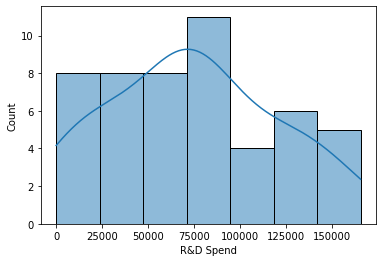

In [7]:
sns.histplot(data['R&D Spend'], kde = True)
plt.show()

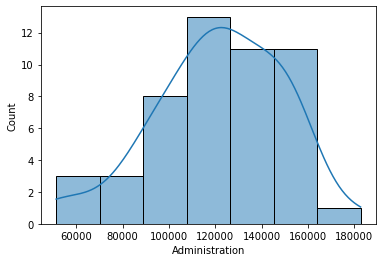

In [8]:
sns.histplot(data['Administration'], kde = True)
plt.show()

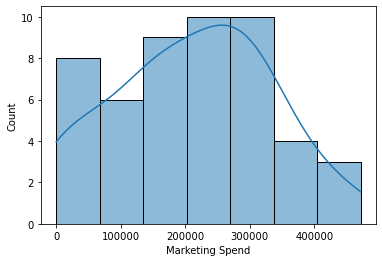

In [9]:
sns.histplot(data['Marketing Spend'], kde = True)
plt.show()

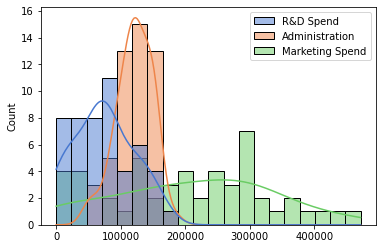

In [10]:
sns.histplot(data.drop('Profit',axis=1), kde = True, bins = 20, multiple = 'stack', palette='muted')
plt.show()

**Pairwise scatter plot for numerical variables**

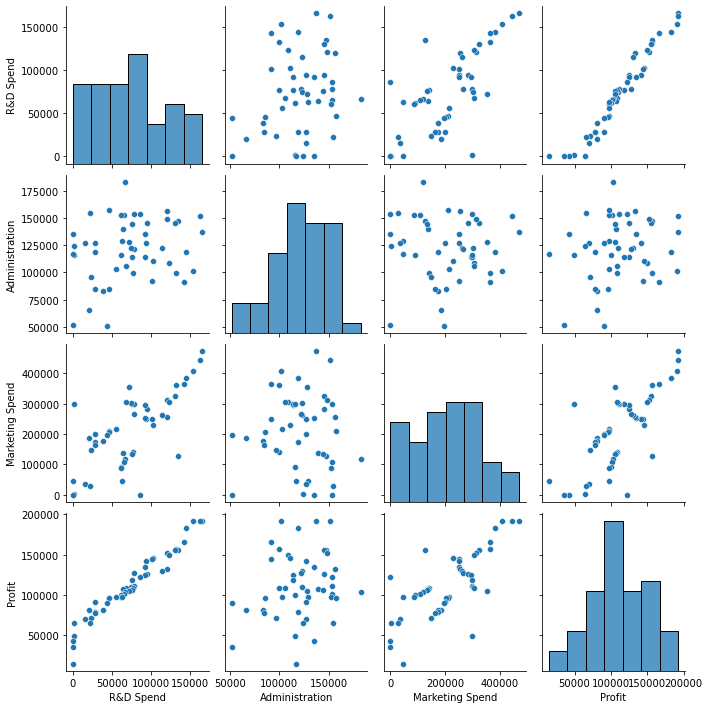

In [11]:
sns.pairplot(data[['R&D Spend','Administration','Marketing Spend','Profit']])
plt.show()

**Correlation Heatmap**

In [12]:
correlation_matrix = data[['R&D Spend','Administration','Marketing Spend','Profit']].corr()

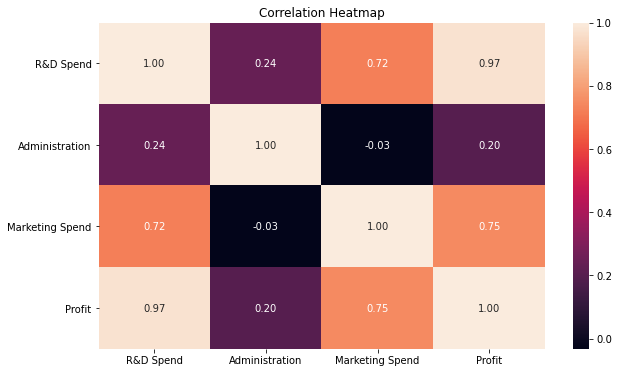

In [13]:
plt.figure(figsize=(10,6))

sns.heatmap(correlation_matrix, annot = True,fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

**Boxplot**

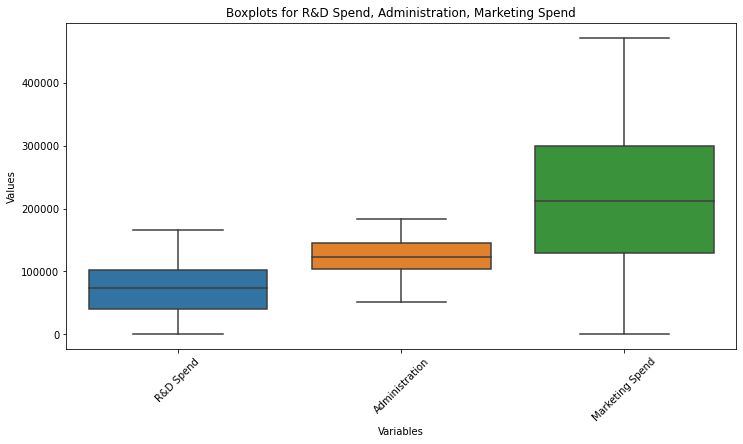

In [14]:
plt.figure(figsize=(12,6))
sns.boxplot(data = data[['R&D Spend','Administration','Marketing Spend']])
plt.title('Boxplots for R&D Spend, Administration, Marketing Spend')
plt.ylabel('Values')
plt.xlabel('Variables')
plt.xticks(rotation=45)
plt.show()

# Preparing a Model

In [15]:
import statsmodels.formula.api as smf

In [16]:
x = data[['R&D Spend', 'Administration', 'Marketing Spend']]
y = data['Profit']

In [17]:
model = smf.ols('y~x', data=data).fit()

In [18]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 05 Jun 2024   Prob (F-statistic):           4.53e-30
Time:                        16:19:27   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.0

In [19]:
# Coefficients
model.params

Intercept    50122.192990
x[0]             0.805715
x[1]            -0.026816
x[2]             0.027228
dtype: float64

In [20]:
# t and p values
print('t_values:','\n',model.tvalues,'\n','\n','p_values:','\n',model.pvalues)

t_values: 
 Intercept     7.626218
x[0]         17.846374
x[1]         -0.525507
x[2]          1.655077
dtype: float64 
 
 p_values: 
 Intercept    1.057379e-09
x[0]         2.634968e-22
x[1]         6.017551e-01
x[2]         1.047168e-01
dtype: float64


In [21]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

**SIMPLE LINEAR REGRESSION MODELS**

In [22]:
x1 = data[['R&D Spend']]
x2 = data[['Administration']]
x3 = data[['Marketing Spend']]

In [23]:
m_x1 = smf.ols('Profit~x1', data = data).fit()
# t and p values
print('t_values:','\n',m_x1.tvalues,'\n','\n','p_values:','\n',m_x1.pvalues)

t_values: 
 Intercept    19.320288
x1           29.151139
dtype: float64 
 
 p_values: 
 Intercept    2.782697e-24
x1           3.500322e-32
dtype: float64


In [24]:
m_x2 = smf.ols('Profit~x2', data = data).fit()
# t and p values
print('t_values:','\n',m_x2.tvalues,'\n','\n','p_values:','\n',m_x2.pvalues)

t_values: 
 Intercept    3.040044
x2           1.419493
dtype: float64 
 
 p_values: 
 Intercept    0.003824
x2           0.162217
dtype: float64


In [25]:
m_x3 = smf.ols('Profit~x3', data = data).fit()
# t and p values
print('t_values:','\n',m_x3.tvalues,'\n','\n','p_values:','\n',m_x3.pvalues)

t_values: 
 Intercept    7.808356
x3           7.802657
dtype: float64 
 
 p_values: 
 Intercept    4.294735e-10
x3           4.381073e-10
dtype: float64


In [26]:
m_x1_x3 = smf.ols('Profit~x1+x3', data = data).fit()
# t and p values:
print('t_values:','\n',m_x1_x3.tvalues,'\n','\n','p_values:','\n',m_x1_x3.pvalues)

t_values: 
 Intercept    17.463582
x1           19.265555
x3            1.927052
dtype: float64 
 
 p_values: 
 Intercept    3.504062e-22
x1           6.040433e-24
x3           6.003040e-02
dtype: float64


# Calculating VIF:

In [27]:
x1 = data[['R&D Spend']]
x2 = data[['Administration']]
x3 = data[['Marketing Spend']]

In [28]:
rsq_x1 = smf.ols('x1~x2+x3', data = data).fit().rsquared
vif_x1 = 1/(1-rsq_x1)

rsq_x2 = smf.ols('x2~x1+x3', data = data).fit().rsquared
vif_x2 = 1/(1-rsq_x2)

rsq_x3 = smf.ols('x3~x1+x2', data = data).fit().rsquared
vif_x3 = 1/(1-rsq_x3)

# Storing VIF values into a dataframe:
d = {'Variables':['R&D Spend','Administration','Marketing Spend'],
     'VIF':[vif_x1,vif_x2,vif_x3]}
vif = pd.DataFrame(d)
print(vif)

         Variables       VIF
0        R&D Spend  2.468903
1   Administration  1.175091
2  Marketing Spend  2.326773


Administration' has the lowest VIF, suggesting it has the least multicollinearity issues.
'R&D Spend' and 'Marketing Spend' have higher VIF values, indicating more multicollinearity among them and possibly with other predictor variables.

# To fit MLR model:

In [29]:
mse1 = np.mean(model.resid ** 2)
print('mean square error',mse1)
print("Root mean squared error:", np.sqrt(mse1).round(3))

mean square error 78417126.01913083
Root mean squared error: 8855.344


In [30]:
r_squared = model.rsquared
print("R-squared:", round(r_squared, 3))

R-squared: 0.951


In [31]:
# multicollinearity check
rsquared = model.rsquared
vif = 1 / (1-rsquared)
print("vif value", vif)

vif value 20.30291711474573


A Variance Inflation Factor (VIF) of 20.302 indicates a high degree of multicollinearity among the independent variables in your model

**Residual Analysis**

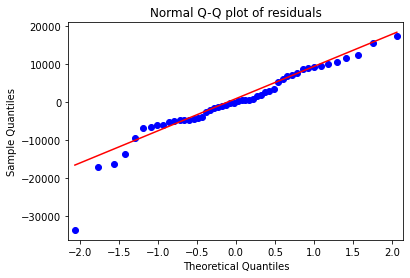

In [32]:
# Test for Normality of Residuals (Q-Q Plot)
import matplotlib.pyplot as plt
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

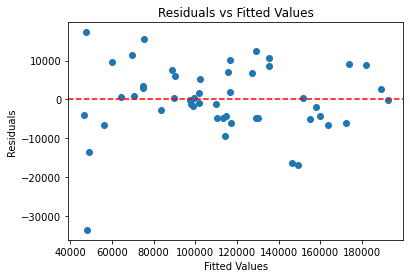

In [33]:
# Homoscedasticity
residuals = model.resid
fitted_values = model.fittedvalues

plt.scatter(fitted_values, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()

In [34]:
def get_standardized_values(vals):
    return (vals - vals.mean()) / vals.std()

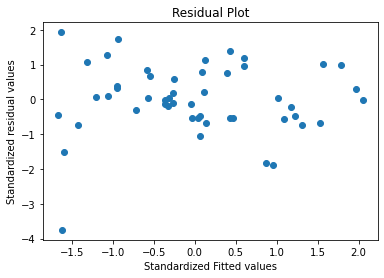

In [35]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

**Residual VS Regressors**

In [36]:
import statsmodels.api as sm

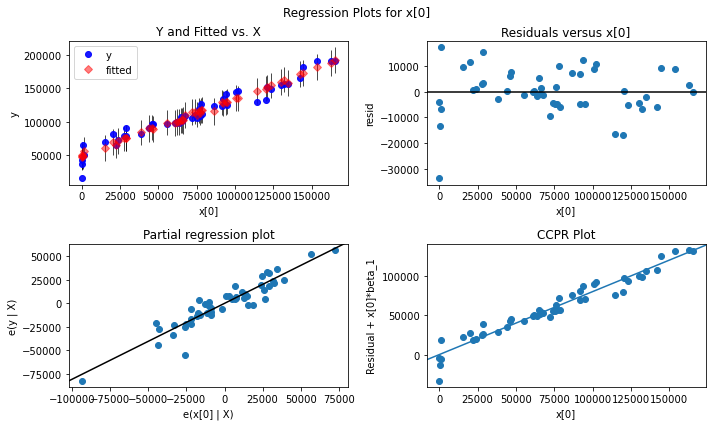

In [37]:
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(model,"x[0]", fig=fig)
plt.show()

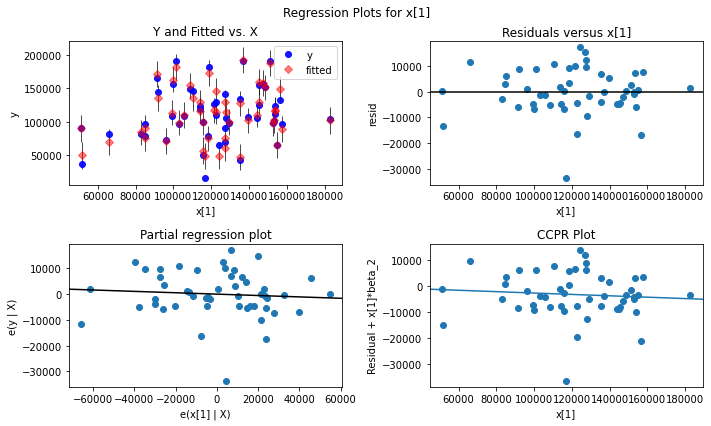

In [38]:
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(model,"x[1]", fig=fig)
plt.show()

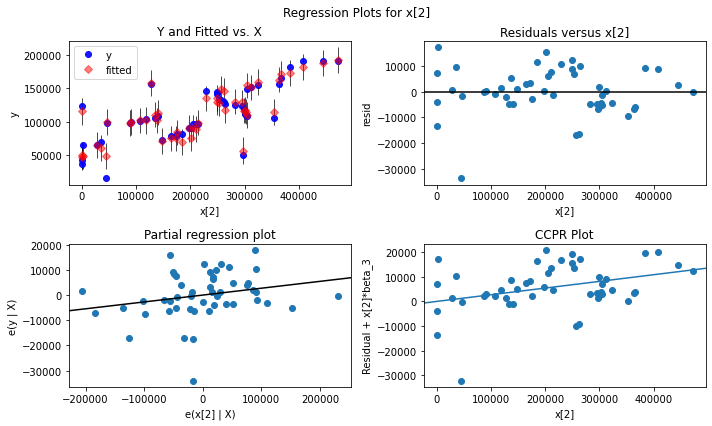

In [39]:
fig = plt.figure(figsize=(10,6))
fig = sm.graphics.plot_regress_exog(model,"x[2]", fig=fig)
plt.show()

**Cook's Distance**

In [40]:
model_influence = model.get_influence()
(c,_) = model_influence.cooks_distance

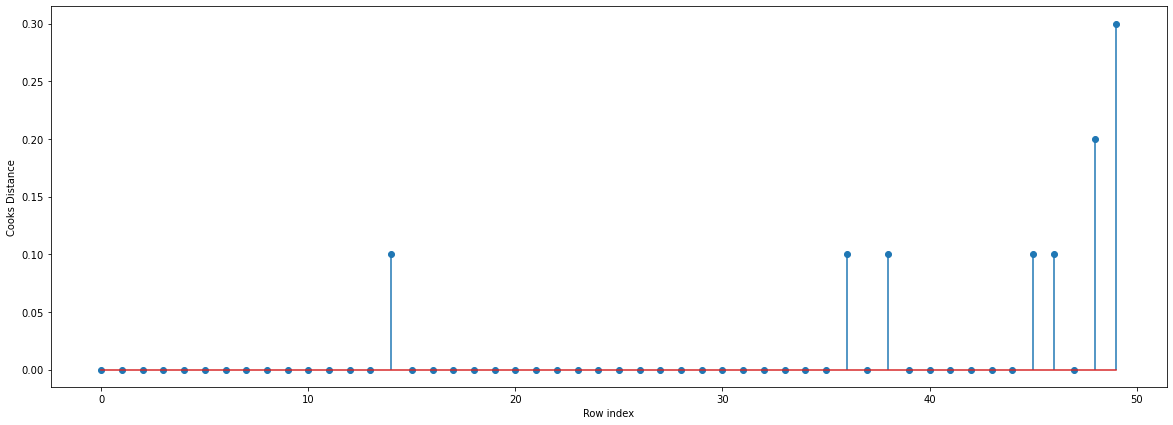

In [41]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data)), np.round(c, 1))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [42]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543263)

**High Influence Points**

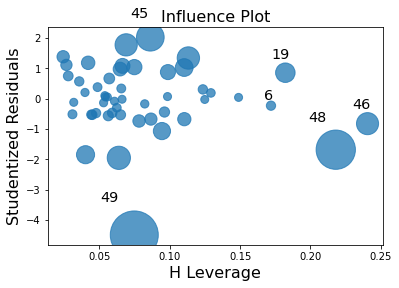

In [43]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [44]:
k = data.shape[1]
n = data.shape[0]
leverage_cutoff = 3*((k+1)/n)

From the above plot, it is evident that data point 47, 48 and 49 are the influencers

In [45]:
data[data.index.isin([47,48,49])]

,R&D Spend,Administration,Marketing Spend,State,Profit
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [46]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Improving the model

In [47]:
#load the data
data_new = pd.read_csv("D:\YUKTA\Assignment\DS\Multi Linear Regression\Startups.csv")

In [48]:
#Discard the data points which are influencers and reasign the row number (reset_index())
data1 = data_new.drop(data_new.index[[47,48,49]],axis=0).reset_index()

In [49]:
#Drop the original index
data1=data1.drop(['index'],axis=1)

In [50]:
data1

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Build Model

In [51]:
x1 = data1[['R&D Spend']]
x2 = data1[['Administration']]
x3 = data1[['Marketing Spend']]

In [52]:
#Exclude variable 'R&D Spend' and generate R-squared and AIC values
final_ml_1 = smf.ols('Profit~x2+x3', data = data1).fit()

In [53]:
(final_ml_1.rsquared, final_ml_1.aic)

(0.5342355884921517, 1087.5259589797236)

In [54]:
#Exclude variable 'Marketing Spend' and generate R-squared and AIC values
final_ml_2 = smf.ols('Profit~x1+x2', data = data1).fit()

In [55]:
(final_ml_2.rsquared, final_ml_2.aic)

(0.9592214016151974, 973.0563987917121)

Comparing above R_squared and AIC values, model **'final_ml_2'** has high R-square and low AIC value hence including variable **'R&D Spend'**  to resolve the problem of multicollinearity

# Cook's Distance

In [56]:
model_influence = final_ml_2.get_influence()
(c_V, _) = model_influence.cooks_distance

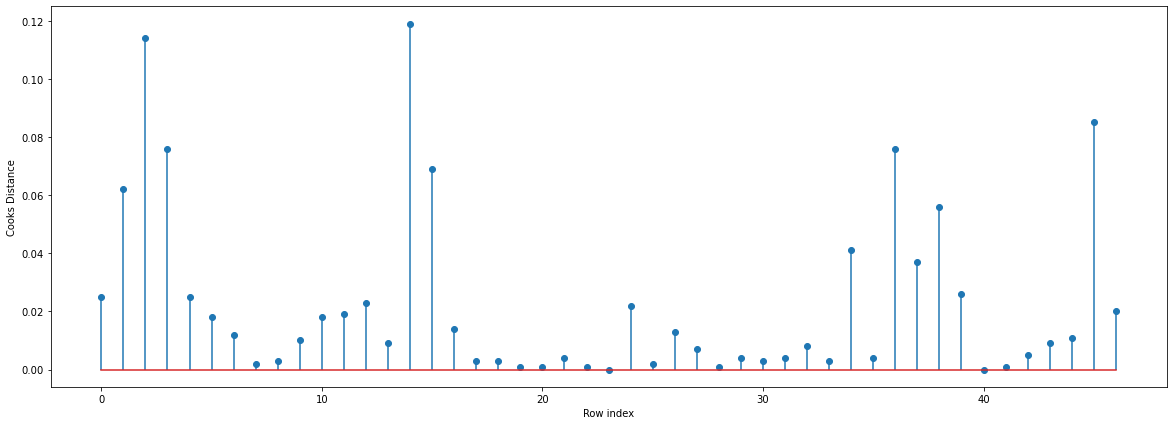

In [57]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [58]:
#index of the data points where c is more than .1
(np.argmax(c_V),np.max(c_V))

(14, 0.11861367054782376)

Since the value is <1, we can stop the diagnostic process and finalize the model

**FINAL MODEL**

In [59]:
#Check the accuracy of the model
final_ml_2 = smf.ols('Profit~x1+x2', data = data1).fit()

(final_ml_2.rsquared, final_ml_2.aic)

(0.9592214016151974, 973.0563987917121)

# Transformations

In [60]:
x1 = data1[['R&D Spend']]
x2 = data1[['Administration']]
y = data1[['Profit']]

In [61]:
r2 = final_ml_2.rsquared

**1) Log Transformation** 

In [62]:
data1['x1'] = np.log(data1['R&D Spend'])
data1['x2'] = np.log(data1['Administration'])

df_log = data1[['x1', 'x2', 'Profit']]

df_log.head()

,x1,x2,Profit
0,12.015815,11.826990,192261.83
1,11.999034,11.927533,191792.06
2,11.941075,11.524316,191050.39
3,11.880151,11.684117,182901.99
4,11.864338,11.422911,166187.94


In [63]:
ml_log = smf.ols('Profit~x1+x2', data = df_log).fit()
r2_log_transformed = ml_log.rsquared

**2) Square Transformation**

In [64]:
data1['x1_sq'] = data1['R&D Spend']**2
data1['x2_sq'] = data1['Administration']**2

df_square = data1[['x1_sq', 'x2_sq', 'Profit']]

df_square.head()

,x1_sq,x2_sq,Profit
0,2.734036e+10,1.874101e+10,192261.83
1,2.643801e+10,2.291517e+10,191792.06
2,2.354430e+10,1.023042e+10,191050.39
3,2.084339e+10,1.408301e+10,182901.99
4,2.019450e+10,8.352456e+09,166187.94


In [65]:
ml_square = smf.ols('Profit~x1_sq+x2_sq', data = df_square).fit()
r2_square_transformed = ml_square.rsquared

**3) Square-Root Transformation**

In [66]:
data1['x1_sqrt'] = np.sqrt(data1['R&D Spend'])
data1['x2_sqrt'] = np.sqrt(data1['Administration'])

df_sqrt = data1[['x1_sqrt', 'x2_sqrt', 'Profit']]

df_sqrt.head()

,x1_sqrt,x2_sqrt,Profit
0,406.631529,369.997027,192261.83
1,403.234051,389.072731,191792.06
2,391.716109,318.033882,191050.39
3,379.963696,344.487808,182901.99
4,376.971272,302.310718,166187.94


In [67]:
ml_sqrt = smf.ols('Profit~x1_sqrt+x2_sqrt', data = df_sqrt).fit()
r2_sqrt_transformed = ml_sqrt.rsquared

In [68]:
results = pd.DataFrame({
    'Transformation': ['None', 'Log', 'Square', 'Square Root'],
    'R-squared values': [r2, r2_log_transformed, r2_square_transformed, r2_sqrt_transformed]
})

print(results)

  Transformation  R-squared values
0           None          0.959221
1            Log          0.608197
2         Square          0.917182
3    Square Root          0.883215
